In [2]:
%matplotlib notebook
%matplotlib inline

In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import csv
import random
import requests
import seaborn as sns

In [4]:
# Tran's graphs
# csv to DataFrame
initial_data = pd.read_csv('social-influence-on-shopping.csv')
initial_data.head()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,What social platform has influenced your onlin...,Mobile,Global results,None,947,0.354


In [5]:
# 'Question' is the same throughout, so let's drop it
initial_data.drop(['Question'], axis=1, inplace=True)
initial_data.drop(['Segment Type'], axis=1, inplace=True)
initial_data.head()

,Segment Description,Answer,Count,Percentage
0,Global results,Facebook,548,0.205
1,Global results,Instagram,916,0.342
2,Global results,Snapchat,86,0.032
3,Global results,Twitter,179,0.067
4,Global results,None,947,0.354


In [6]:
categories = initial_data.groupby('Segment Description')
count_categories = categories['Segment Description'].count()
count_categories

Segment Description
Appalachian State University                       5
Arbroath Academy                                   5
Are you a? SVB team member                         5
Are you a? Student Trekker                         5
Are you single? No                                 5
                                                  ..
your zodiac sign? Pisces (Feb 19 - Mar 20)         5
your zodiac sign? Sagittarius (Nov 22 - Dec 21)    5
your zodiac sign? Scorpio (Oct 23 - Nov 21)        5
your zodiac sign? Taurus (Apr 20 - May 20)         5
your zodiac sign? Virgo (Aug 23 - Sep 22)          5
Name: Segment Description, Length: 289, dtype: int64

In [7]:
# overview
overview_df = pd.DataFrame(initial_data.iloc[0:5, :])
overview_df

,Segment Description,Answer,Count,Percentage
0,Global results,Facebook,548,0.205
1,Global results,Instagram,916,0.342
2,Global results,Snapchat,86,0.032
3,Global results,Twitter,179,0.067
4,Global results,None,947,0.354


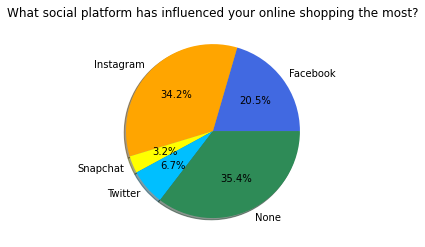

In [8]:
# pie chart

labels = overview_df['Answer']
sizes = overview_df['Percentage']
colors = ["royalblue", "orange", "yellow", "deepskyblue", "seagreen"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("What social platform has influenced your online shopping the most?")
plt.show()

In [26]:
# save pie
plt.savefig("overview.png")

<Figure size 432x288 with 0 Axes>

In [9]:
# by gender - f/m
gender_f = pd.DataFrame(initial_data.iloc[10:15, :3])
gender_m = pd.DataFrame(initial_data.iloc[15:20, :3])
gender_merge = pd.merge(gender_f, gender_m, on="Answer", how="outer")
gender_merge = gender_merge.rename(columns={"Count_x":"Count (Female Voters)", "Count_y":"Count (Male Voters)"})
gender_merge

,Segment Description_x,Answer,Count (Female Voters),Segment Description_y,Count (Male Voters)
0,Female voters,Facebook,222,Male voters,326
1,Female voters,Instagram,535,Male voters,380
2,Female voters,Snapchat,29,Male voters,56
3,Female voters,Twitter,57,Male voters,122
4,Female voters,None,271,Male voters,678


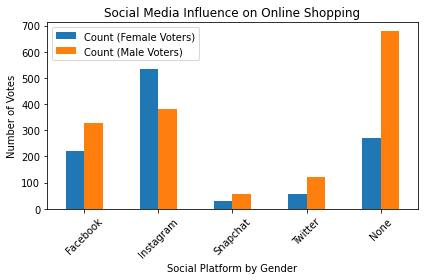

In [10]:
# bar graph - multi plot, if possible
multi_plot = gender_merge.plot(kind="bar")
multi_plot.set_xticklabels(gender_merge["Answer"], rotation=45)
plt.title("Social Media Influence on Online Shopping")
plt.xlabel("Social Platform by Gender")
plt.ylabel("Number of Votes")
plt.tight_layout()

In [ ]:
# save figure
plt.savefig("gender_bar2.png")

In [11]:
# income of parents
upper_class = pd.DataFrame(initial_data.iloc[915:920, :3])
upper_middle = pd.DataFrame(initial_data.iloc[920:925, :3])
middle_class = pd.DataFrame(initial_data.iloc[925:930, :3])
lower_class = pd.DataFrame(initial_data.iloc[930:935, :3])

# getting counts
upper_counts = upper_class['Count'].sum()
upper_middle_counts = upper_middle['Count'].sum()
middle_counts = middle_class['Count'].sum()
lower_counts = lower_class['Count'].sum()

income_summary = [upper_counts, upper_middle_counts, middle_counts, lower_counts]
income_summary

[304, 451, 340, 134]

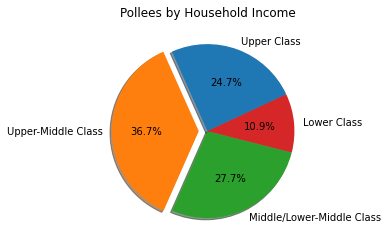

In [12]:
# pie chart
labels = ['Upper Class', 'Upper-Middle Class', 'Middle/Lower-Middle Class', 'Lower Class']
sizes = income_summary
explode = [0, 0.1, 0, 0]

plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=25)
plt.title("Pollees by Household Income")
plt.show()

In [10]:
# save fig
plt.savefig("incomes_pie.png")

In [13]:
# ethnicities - individual
ethnicity_asian = pd.DataFrame(initial_data.iloc[970:975, :3])
ethnicity_black = pd.DataFrame(initial_data.iloc[1215:1220, :3])
ethnicity_hispanic = pd.DataFrame(initial_data.iloc[1350: 1355, :3])
ethnicity_white = pd.DataFrame(initial_data.iloc[1440:1445, :3])
ethnicity_other = pd.DataFrame(initial_data.iloc[1170:1175, :3])
ethnicity_native_american = pd.DataFrame(initial_data.iloc[1175:1180, :3])

# collecting counts
asian_sum = ethnicity_asian['Count'].sum()
black_sum = ethnicity_black['Count'].sum()
hispanic_sum = ethnicity_hispanic['Count'].sum()
white_sum = ethnicity_white['Count'].sum() 
other_sum = ethnicity_other['Count'].sum() + ethnicity_native_american['Count'].sum()

ethnicity_summary = [asian_sum, black_sum, hispanic_sum, white_sum, other_sum]
ethnicity_summary

[192, 94, 113, 1572, 105]

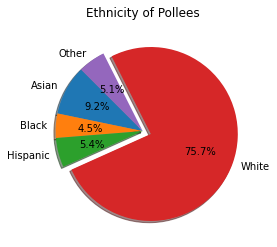

In [14]:
# ethnicity pie chart
labels = ["Asian", "Black", "Hispanic", "White", "Other"]
sizes = ethnicity_summary
explode = [0, 0, 0, 0.1, 0]

plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=135)
plt.title("Ethnicity of Pollees")
plt.show()

In [ ]:
# save figure
plt.savefig("ethnicities_pie.png")

In [15]:
# Steph's graphs
# Study data files
Facebook_Ads = "Facebook_Ads_2.csv"
Social_Network_Ads="Social_Network_Ads(1).csv"

# Read the csv data and the study results
Facebook_Ads = pd.read_csv(Facebook_Ads)
Facebook_Ads.rename(columns={'Salary':'Estimated Salary'}, inplace=True)

Social_Network_Ads=pd.read_csv(Social_Network_Ads)

Facebook_Ads.columns=['Names','Time_Spent_on_Site', 'Estimated_Salary', 'Clicked']

Social_Network_Ads.columns=['User_ID','Gender', 'Age', 'Estimated_Salary', 'Purchased']

In [16]:
Facebook_Ads.head(10)

,Names,Time_Spent_on_Site,Estimated_Salary,Clicked
0,Martina Avila,25.649648,"$55,330.06",0
1,Harlan Barnes,32.456107,"$79,049.08",1
2,Naomi Rodriquez,20.945978,"$41,098.61",0
3,Jade Cunningham,54.039325,"$37,143.36",1
4,Cedric Leach,34.249729,"$37,355.11",0
5,Carla Hester,52.009946,"$80,642.65",1
6,Griffin Rivera,42.881370,"$61,908.40",1
7,Orli Casey,25.676920,"$29,851.41",0
8,Marny Obrien,40.698233,"$34,281.12",1
9,Rhonda Chavez,29.687362,"$41,098.88",0


In [17]:
Facebook_Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   Time_Spent_on_Site  499 non-null    float64
 2   Estimated_Salary    499 non-null    object 
 3   Clicked             499 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.7+ KB


In [18]:
#count to confirm above
Facebook_Ads.count()

Names                 499
Time_Spent_on_Site    499
Estimated_Salary      499
Clicked               499
dtype: int64

In [19]:
##No missing/null values to drop

In [20]:
#total clicks 
clicks=Facebook_Ads['Clicked'].count()
clicks

499

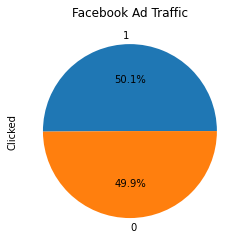

Per each visit to Facebook, 50.1% visitors clicked on an ad while 49.9% did not click on an ad.


In [21]:
clicks = Facebook_Ads.Clicked.value_counts()
clicks.plot(kind="pie",autopct='%1.1f%%')
plt.title("Facebook Ad Traffic")
plt.savefig("FB_Ad_Traffic_PIE")
plt.show()
print("Per each visit to Facebook, 50.1% visitors clicked on an ad while 49.9% did not click on an ad.")

In [22]:
# Average amount of time spent on site
average_time_spent=(Facebook_Ads["Time_Spent_on_Site"].mean())

average_time_spent

32.920178330208415

In [23]:
#chart time spent on site by participant in data file
line_chart = Facebook_Ads.groupby('Time_Spent_on_Site')['Names']
time_spent= pd.DataFrame(line_chart)
time_spent.head(20)

,0,1
0,5.000000,"492 Nolan Name: Names, dtype: object"
1,7.521480,"328 Sexton, Shaeleigh H. Name: Names, dtype..."
2,7.764373,"443 Aristotle Name: Names, dtype: object"
3,10.508806,"146 Allen Burke Name: Names, dtype: object"
4,10.864857,"191 Gannon Marquez Name: Names, dtype: object"
5,11.451366,"361 Beach, Victor S. Name: Names, dtype: ob..."
6,11.863239,"93 Yen Santana Name: Names, dtype: object"
7,11.931267,"298 Jelani A. Wall Name: Names, dtype: object"
8,12.866031,"98 Emerald Hamilton Name: Names, dtype: object"
9,13.194055,"435 Brady Name: Names, dtype: object"


The average amount of time spent on the site was 32.92 minutes.


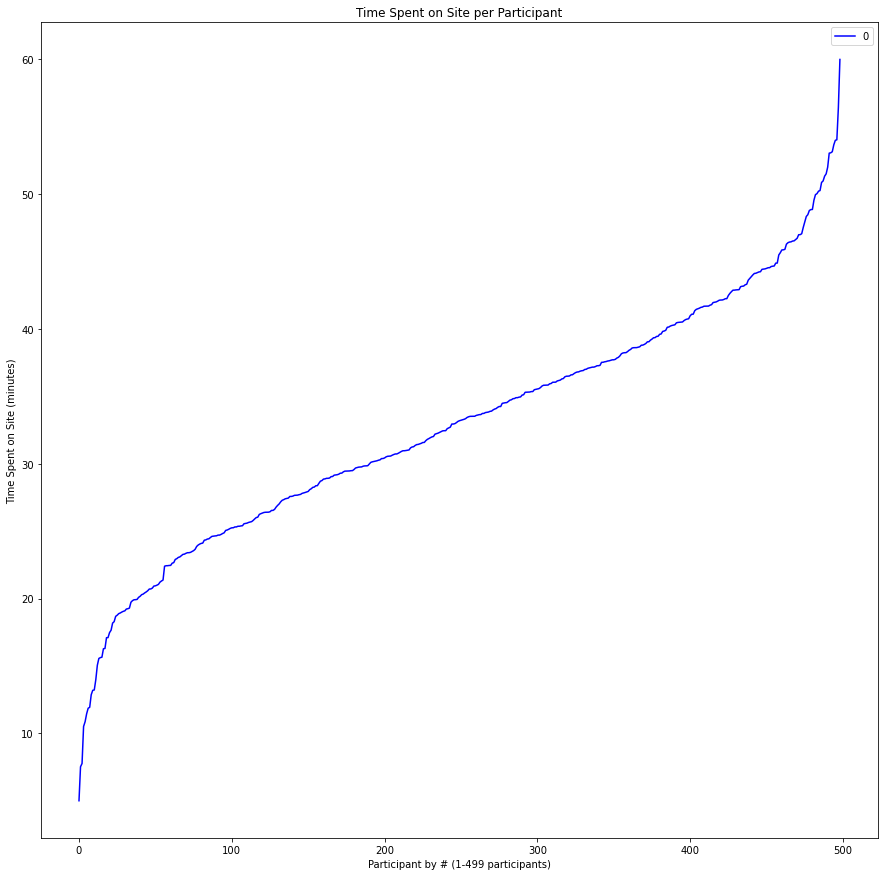

In [24]:
#set-up line chart to show length of time each participant in data group spent on site
time_spent.plot(kind="line", figsize=(15,15), color = "b", legend=True)
plt.ylabel("Time Spent on Site (minutes)")
plt.xlabel("Participant by # (1-499 participants)")
plt.title("Time Spent on Site per Participant")
plt.savefig("Time Spent on Site per Participant- Line graph")

print("The average amount of time spent on the site was 32.92 minutes.")

In [25]:
Social_Network_Ads.head(10)

,User_ID,Gender,Age,Estimated_Salary,Purchased
0,15624510,Male,19,"$19,000.00",0
1,15810944,Male,35,"$20,000.00",0
2,15668575,Female,26,"$43,000.00",0
3,15603246,Female,27,"$57,000.00",0
4,15804002,Male,19,"$76,000.00",0
5,15728773,Male,27,"$58,000.00",0
6,15598044,Female,27,"$84,000.00",0
7,15694829,Female,32,"$150,000.00",1
8,15600575,Male,25,"$33,000.00",0
9,15727311,Female,35,"$65,000.00",0


In [26]:
#check for irregularites/null 
Social_Network_Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           400 non-null    int64 
 1   Gender            400 non-null    object
 2   Age               400 non-null    int64 
 3   Estimated_Salary  400 non-null    object
 4   Purchased         400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [27]:
#count to confirm above
Social_Network_Ads.count()

User_ID             400
Gender              400
Age                 400
Estimated_Salary    400
Purchased           400
dtype: int64

In [28]:
##No missing/null values to drop

In [29]:
#how many purcahses total? 
purchases=Social_Network_Ads['Purchased'].sum()
purchases

143

In [30]:
age_counts = Social_Network_Ads["Age"].value_counts()
age_counts

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

In [31]:
# Convert the age_counts Series into a DataFrame
age_counts_df = pd.DataFrame(age_counts)
age_counts_df.head()

,Age
35,32
37,20
26,16
41,16
42,16


In [32]:
# Convert the column name into "Sum of ages"
age_counts_df = age_counts_df.rename(
    columns={"Age": "Sum of Ages"})
age_counts_df

,Sum of Ages
35,32
37,20
26,16
41,16
42,16
39,15
40,15
48,14
47,14
27,13


The most frequent age per participant is 35 years old.


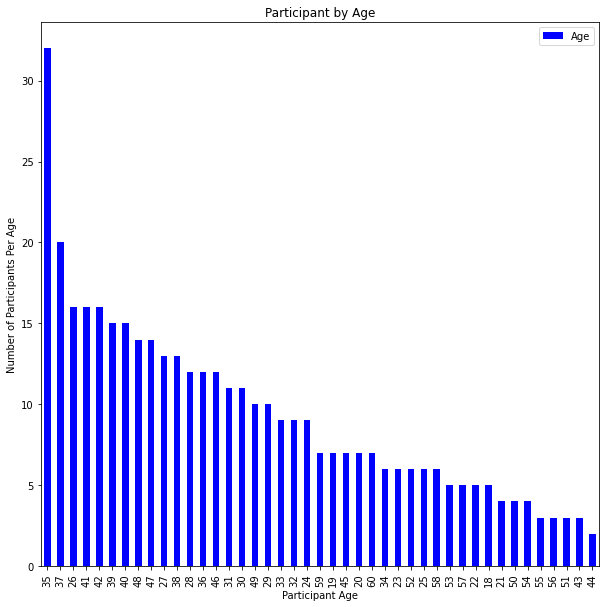

In [33]:
age_counts.plot(kind="bar", figsize=(10,10), color = "b",legend=True)
plt.ylabel("Number of Participants Per Age")
plt.xlabel("Participant Age")
plt.title("Participant by Age")
plt.savefig('Participents by age')

print("The most frequent age per participant is 35 years old.")

In [34]:
salary_counts = Social_Network_Ads["Estimated_Salary"].value_counts()
salary_counts

 $72,000.00      12
 $80,000.00      11
 $79,000.00      10
 $75,000.00       9
 $71,000.00       9
                 ..
 $123,000.00      1
 $37,000.00       1
 $115,000.00      1
 $148,000.00      1
 $139,000.00      1
Name: Estimated_Salary, Length: 117, dtype: int64

In [35]:
# Convert the salary_counts Series into a DataFrame
salary_counts_df = pd.DataFrame(salary_counts)
salary_counts_df.head()

,Estimated_Salary
"$72,000.00",12
"$80,000.00",11
"$79,000.00",10
"$75,000.00",9
"$71,000.00",9


In [36]:
# Convert the column name into "Sum of ages"
salary_counts_df = salary_counts_df.rename(
    columns={"Estimated Salary": "Sum of Estimated Salary"})
salary_counts_df

,Estimated_Salary
"$72,000.00",12
"$80,000.00",11
"$79,000.00",10
"$75,000.00",9
"$71,000.00",9
...,...
"$123,000.00",1
"$37,000.00",1
"$115,000.00",1
"$148,000.00",1


In [37]:
#Determine average (mean) salary and groupby mean
average_salary= Social_Network_Ads.groupby(['Estimated_Salary']).mean()
average_salary

,User_ID,Age,Purchased
Estimated_Salary,,,
"$100,000.00",15744279.00,32.00,1.00
"$101,000.00",15660866.00,58.00,1.00
"$102,000.00",15593715.00,60.00,1.00
"$104,000.00",15669887.25,51.25,1.00
"$105,000.00",15729908.00,47.00,1.00
...,...,...,...
"$93,000.00",15734161.00,37.00,1.00
"$95,000.00",15569641.00,58.00,1.00
"$96,000.00",15691158.75,40.00,0.75


In [38]:
#create table with count of purchases per age
line_chart = Social_Network_Ads.groupby('Age').count()['Purchased']
age_purchase= pd.DataFrame(line_chart)
age_purchase.head(20)

,Purchased
Age,
18,5
19,7
20,7
21,4
22,5
23,6
24,9
25,6
26,16


The rate of purcahses peak between ages 30-40.


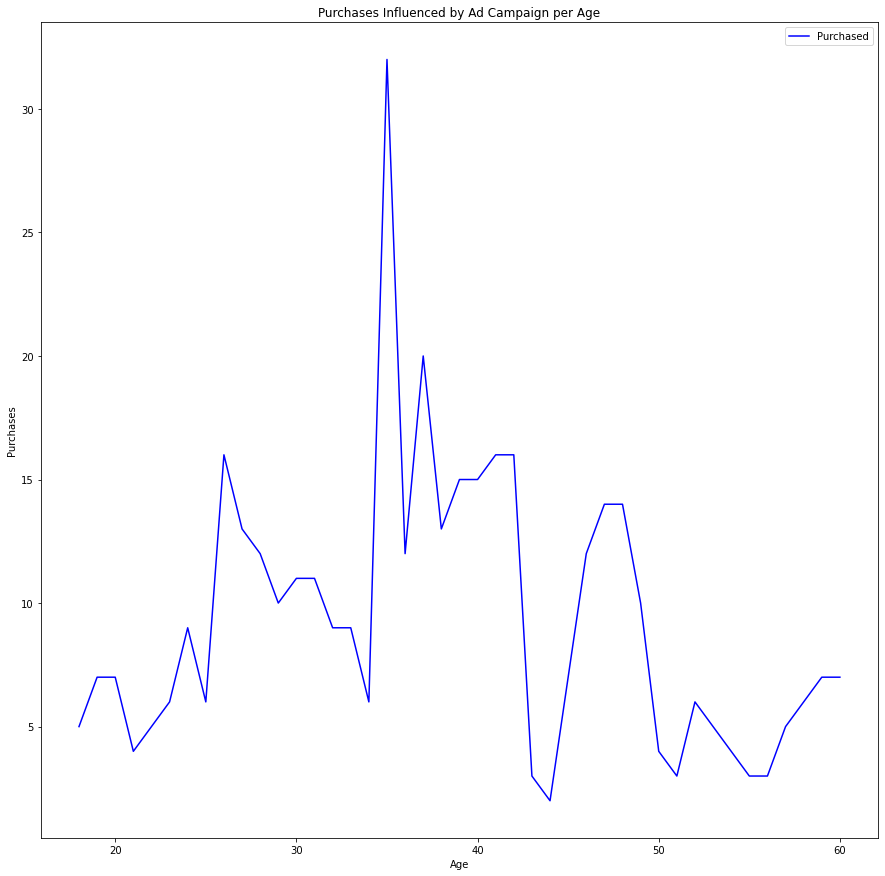

In [39]:
#set-up line chart to show how many instances purchases were made participant per age

age_purchase.plot(kind="line", figsize=(15,15), color = "b", legend=True)
plt.ylabel("Purchases")
plt.xlabel("Age")
plt.title("Purchases Influenced by Ad Campaign per Age")
plt.savefig("Purchases Influenced by Ad Campaign per Age - Line graph")

print("The rate of purcahses peak between ages 30-40.")

In [40]:
#create table with count of purchases per gender
bar_chart = Social_Network_Ads.groupby('Gender').count()['Purchased']
gender_purchase= pd.DataFrame(bar_chart)
gender_purchase.head(20)

,Purchased
Gender,
Female,204
Male,196


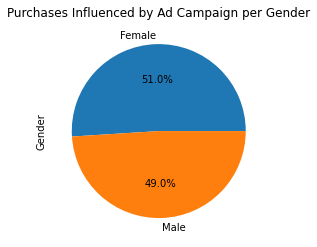

Slightly more purchases were made by Females than males; 2% to be exact.


In [41]:
# Generate a pie plot showing the distribution of male/female purchases
counts = Social_Network_Ads.Gender.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.title("Purchases Influenced by Ad Campaign per Gender")
plt.savefig("Purchases Influenced by Ad Campaign per Gender_PIE")
plt.show()
print("Slightly more purchases were made by Females than males; 2% to be exact.")

In [3]:
# Hinley's graphs
conversion_data = pd.read_csv('KAG_conversion_data.csv')   
conversion_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
# checking for types/irregularities 
conversion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
# there are as many ad ids as observations and can therefore be dropped. Did the same fore FB campaign ids
conversion_data.drop(['ad_id'], axis = 1, inplace = True)
conversion_data.drop(['fb_campaign_id'], axis = 1, inplace = True)
conversion_data

,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,916,30-34,M,15,7350,1,1.430000,2,1
1,916,30-34,M,16,17861,2,1.820000,2,0
2,916,30-34,M,20,693,0,0.000000,1,0
3,916,30-34,M,28,4259,1,1.250000,1,0
4,916,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...
1138,1178,45-49,F,109,1129773,252,358.189997,13,2
1139,1178,45-49,F,110,637549,120,173.880003,3,0
1140,1178,45-49,F,111,151531,28,40.289999,2,0
1141,1178,45-49,F,113,790253,135,198.710001,8,2


In [6]:
spent = conversion_data['Spent'].sum()
round(spent)

58705

In [7]:
Impressions = conversion_data['Impressions'].sum()
Impressions

213434828

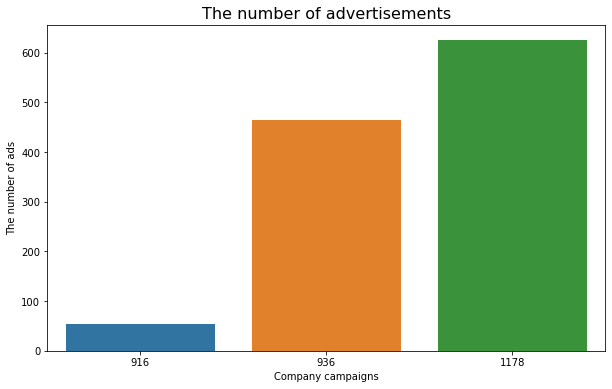

In [8]:
# count the campaign
fig=plt.figure(figsize=(10,6))
sns.countplot(x ='xyz_campaign_id', data = conversion_data)
plt.xlabel('Company campaigns')
plt.ylabel('The number of ads')
plt.title('The number of advertisements', fontsize=16)
plt.savefig("kag_images/campaigncount_final.png")
plt.show()

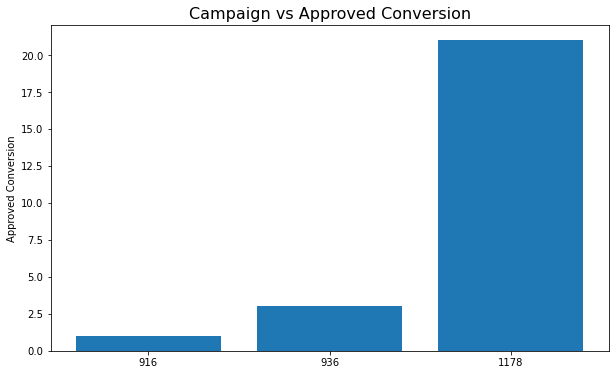

In [9]:
#Approved_Conversion
fig=plt.figure(figsize=(10,6))
plt.bar(conversion_data["xyz_campaign_id"].astype(str), conversion_data["Approved_Conversion"])
plt.ylabel("Approved Conversion")
plt.title("Campaign vs Approved Conversion", fontsize=16)
plt.savefig("kag_images/campaign_bar_final.png")
plt.show()

# From the graph we can see that campaign 1178 has the highest approved conversions which means people are mostly buying things though this campign

In [11]:
# gender
gender = conversion_data['gender'].value_counts()
gender

M    592
F    551
Name: gender, dtype: int64

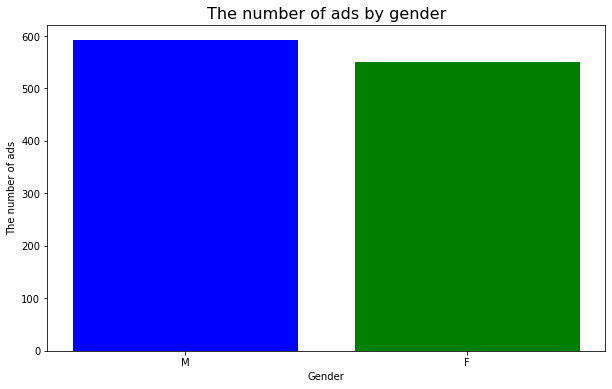

In [12]:
fig=plt.figure(figsize=(10,6))
gender = conversion_data['gender'].value_counts()
plt.bar(gender.index.values,gender.values,  color=['blue','green'])
plt.xlabel('Gender')
plt.ylabel('The number of ads')
plt.title('The number of ads by gender', fontsize=16)
plt.savefig("kag_images/gender_bar_final.png")
plt.show();

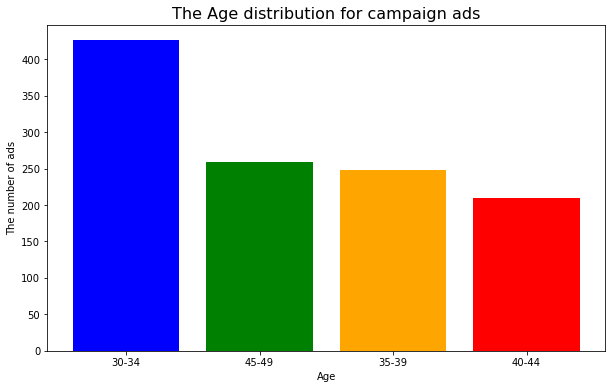

In [13]:
# age
fig=plt.figure(figsize=(10,6))
ages = conversion_data['age'].value_counts()
plt.bar(ages.index.values,ages.values, color=['blue','green','orange','red'])
plt.xlabel('Age')
plt.ylabel('The number of ads')
plt.title('The Age distribution for campaign ads', fontsize=16)
plt.savefig("kag_images/age dis of campaign_final.png")
plt.show()

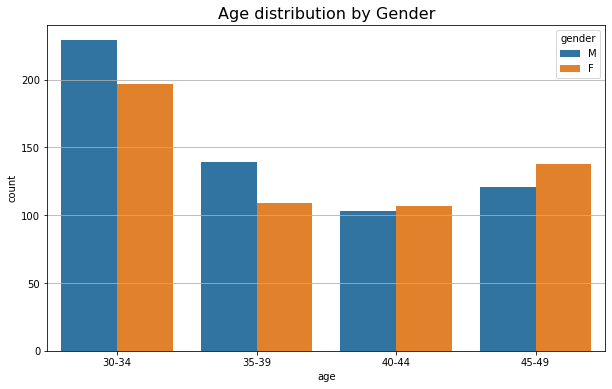

In [14]:
fig=plt.figure(figsize=(10,6))
sns.countplot(data=conversion_data, x='age', hue='gender')
plt.title('Age distribution by Gender', fontsize=16)
plt.grid(axis='y')
plt.savefig("kag_images/age by gender_final.png")

In [15]:
# Based on both graphs both genders have the same intrest but people in the age range 30-34 show the most intrest in the ad campaigns

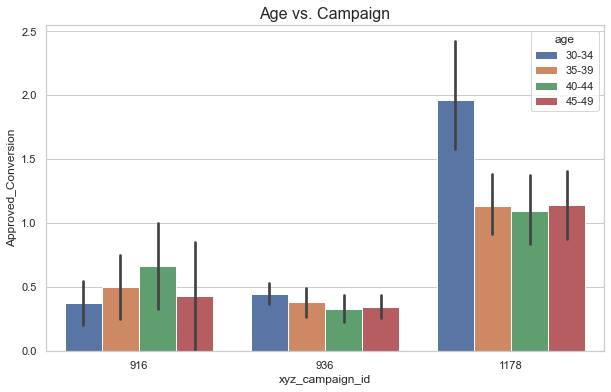

In [16]:
fig=plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=conversion_data["xyz_campaign_id"], y=conversion_data["Approved_Conversion"], hue=conversion_data["age"], data=tips)
plt.title('Age vs. Campaign', fontsize=16)
plt.savefig("kag_images/age vs campaign_final.png")

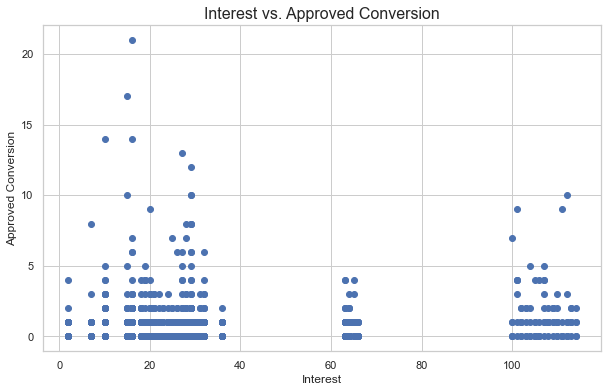

In [17]:
# Campaign Ads - Interests
fig=plt.figure(figsize=(10,6))
plt.scatter(conversion_data["interest"], conversion_data["Approved_Conversion"])
plt.title("Interest vs. Approved Conversion", fontsize=16)
plt.xlabel("Interest")
plt.ylabel("Approved Conversion")
plt.savefig("kag_images/Interest vs. Approved_final.png")
plt.show()

<Figure size 720x432 with 0 Axes>

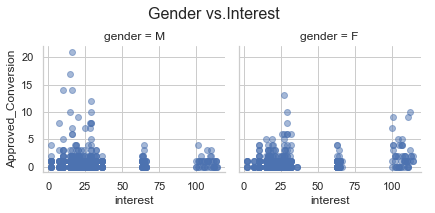

In [18]:
fig=plt.figure(figsize=(10,6))
c = sns.FacetGrid(conversion_data,  col="gender" )
c.map(plt.scatter, "interest", "Approved_Conversion", alpha=.5)
c.fig.subplots_adjust(top=.8)
c.fig.suptitle("Gender vs.Interest", fontsize=16)
c.add_legend()
plt.savefig("kag_images/age interest approved_final.png")

In [19]:
# In the plots above, men tend to click more than women but women buy more products than men after clicking the add.

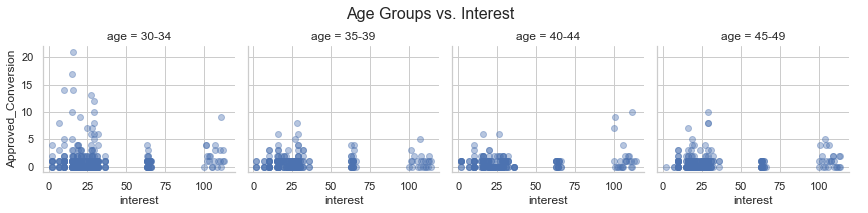

In [20]:
g = sns.FacetGrid(conversion_data, col="age")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.fig.subplots_adjust(top=.8)
g.fig.suptitle("Age Groups vs. Interest", fontsize=16)
g.add_legend()
plt.savefig("kag_images/Age Groups vs. Intrest_final.png")

In [21]:
# In different age groups, it seems like people in age group 30-34 has more tendency to buy product after clicking the add.

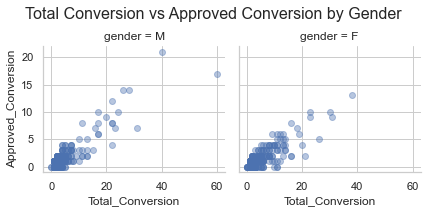

In [22]:
# After inquiring the product
g = sns.FacetGrid(conversion_data, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.fig.subplots_adjust(top=.8)
g.fig.suptitle("Total Conversion vs Approved Conversion by Gender", fontsize=16)
g.add_legend()
plt.savefig("kag_images/Total Conversion vs Approved Conversion_final.png")

In [23]:
# From these 2 graphs, we can see that women buy more products than men after enquiring the product. However, men tends to enquire more about the product.

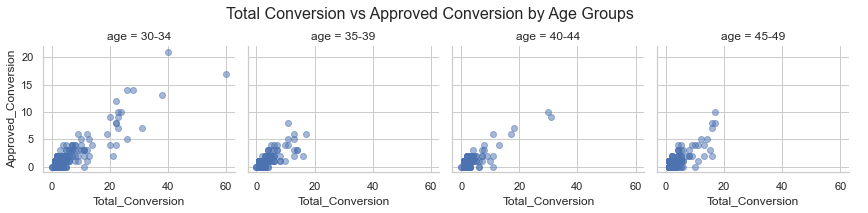

In [24]:
g = sns.FacetGrid(conversion_data, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion",alpha=.5)
g.fig.subplots_adjust(top=.8)
g.fig.suptitle("Total Conversion vs Approved Conversion by Age Groups", fontsize=16)
g.add_legend()
plt.savefig("kag_images/Total Conversion vs Approved Conversion Age_final.png")

In [25]:
# People in age group 30-34 are more likely to buy the product after enquiring the product.

In [26]:
# total number of clicks
clicks = conversion_data['Clicks'].sum()
clicks

38165

In [27]:
#Total_Conversion
Total_Conversion = conversion_data['Total_Conversion'].sum()
Total_Conversion

3264

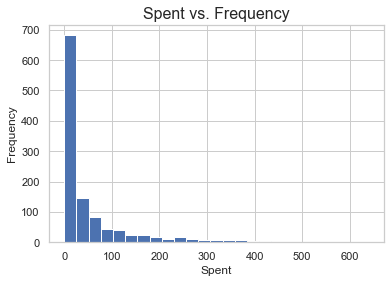

In [28]:
# Money Spent
#spent vs frequency 
plt.hist(conversion_data['Spent'], bins = 25)
plt.title("Spent vs. Frequency", fontsize=16)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.savefig("kag_images/Spent vs Frequency_final.png")
plt.show()

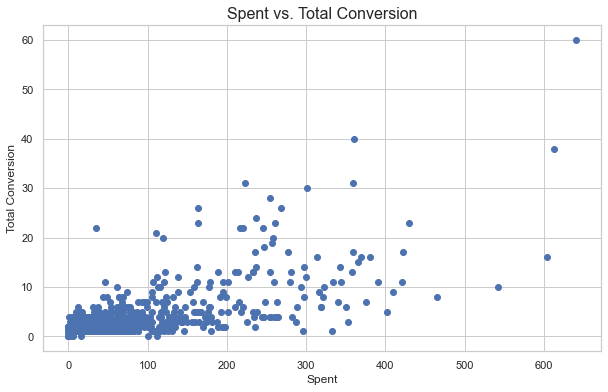

In [29]:
#spent vs total conversion 
fig=plt.figure(figsize=(10,6))
plt.scatter(conversion_data["Spent"], conversion_data["Total_Conversion"])
plt.title("Spent vs. Total Conversion", fontsize=16)
plt.xlabel("Spent")
plt.ylabel("Total Conversion")
plt.savefig("kag_images/spent vs total_final.png")
plt.show()

In [30]:
#Approved_Conversion
Approved_Conversion = conversion_data['Approved_Conversion'].sum()
Approved_Conversion

1079

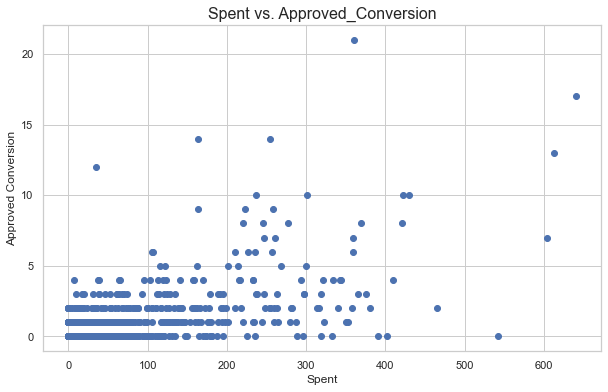

In [31]:
#spent vs approved 
fig=plt.figure(figsize=(10,6))
plt.scatter(conversion_data["Spent"], conversion_data["Approved_Conversion"])
plt.title("Spent vs. Approved_Conversion", fontsize=16)
plt.xlabel("Spent")
plt.ylabel("Approved Conversion")
plt.savefig("kag_images/spent vs approved_final.png")
plt.show()

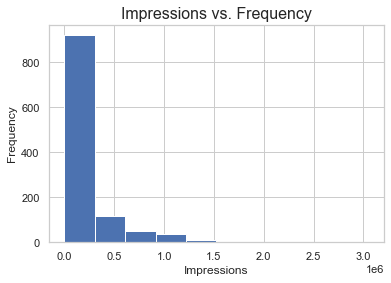

In [32]:
# Impressions
plt.hist(conversion_data['Impressions'])
plt.title("Impressions vs. Frequency", fontsize=16)
plt.xlabel("Impressions")
plt.ylabel("Frequency")
plt.savefig("kag_images/impressions vs frequency.png")
plt.show()

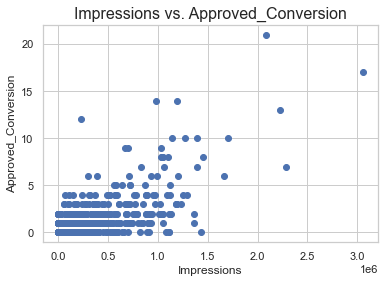

In [33]:
plt.scatter(conversion_data["Impressions"], conversion_data["Approved_Conversion"])
plt.title("Impressions vs. Approved_Conversion", fontsize=16)
plt.xlabel("Impressions")
plt.ylabel("Approved_Conversion")
plt.savefig("kag_images/Impressions vs approved_final.png")
plt.show()

In [34]:
# In the 2 plots above, you can see that there is a rise in approved conversions after a ceratin point of impressions.

In [35]:
# Impressions vs. Clicks
conversion_data[['Impressions', 'Clicks']].corr()

,Impressions,Clicks
Impressions,1.000000,0.948514
Clicks,0.948514,1.000000


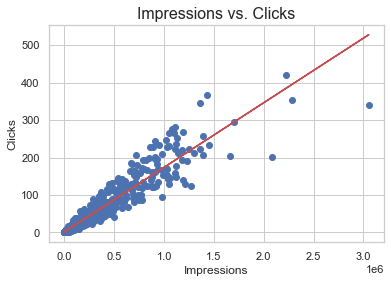

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(conversion_data["Impressions"],conversion_data["Clicks"])
regress_values = conversion_data["Impressions"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(conversion_data["Impressions"], conversion_data["Clicks"])
plt.plot(conversion_data["Impressions"],regress_values,"r-")
#plt.annotate(line_eq,(20,36),fontsize=16,color="red")
plt.title("Impressions vs. Clicks", fontsize=16)
plt.xlabel("Impressions")
plt.ylabel("Clicks")
plt.savefig("kag_images/Impressions vs Clicks_final.png")
plt.show()

In [37]:
# The more a campaign displayed the more users will click on the ads. There is also a positive linear relationship.

In [38]:
# Spent vs Clicks
conversion_data[['Spent', 'Clicks']].corr()

,Spent,Clicks
Spent,1.000000,0.992906
Clicks,0.992906,1.000000


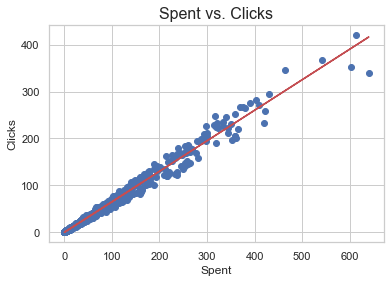

In [39]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(conversion_data["Spent"],conversion_data["Clicks"])
regress_values = conversion_data["Spent"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(conversion_data["Spent"], conversion_data["Clicks"])
plt.plot(conversion_data["Spent"],regress_values,"r-")
#plt.annotate(line_eq,(20,36),fontsize=16,color="red")
plt.title("Spent vs. Clicks", fontsize=16)
plt.xlabel("Spent")
plt.ylabel("Clicks")
plt.savefig("kag_images/Spent vs Clicks_final.png")
plt.show()

In [40]:
# There is a positive linear relationship between Spent and Click Through Rate.